# Lending Club Case Study
---
##### By Harsh R, Kavita Gupta

## Table of Contents:  <a class="anchor" id="toc"></a>

* [Introduction](#introduction)
* [Data Understanding](#data-understanding)
* [Data Cleaning](#data-cleaning)
    - [Cleaning Missing Values](#missing-values)
    - [Removal of Redundant Columns](#removal)
    - [Filling missing values](#filling-missing-values)
    - [Standardisation of Data](#standardisation)
* [Data Analysis](#data-analysis)
    - [Univariate Analysis](#univariate)
    - [Segmented Univariate Analysis](#segmented-univariate)
    - [Bivariate / Multivariate Analysis](#bivariate)
* [Recommendations](#recommendations)


## Introduction <a class="anchor" id="introduction"></a>

### What is Lending Club?

Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. Borrowers who default on their loans are the largest cause for loss for Lending Club. Lending Club wants to understand the driving factors behind loan default.

### Objective

The objective of this case study is to use EDA techniques to analyze the loan data
provided by Lending Club and identify the driving factors and generate observations
and recommendations.

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
# Initializing constants
CHARGED_OFF = "Charged Off"
FULLY_PAID = "Fully Paid"

# Default color palette for the graphs to maintain uniformity
bright_colors = sns.color_palette("bright")
sns.set_palette(bright_colors)

## Data Understanding  <a class="anchor" id="data-understanding"></a>
**[Back to top](#toc)**

In [3]:
# Read the loan dataset
loan_data = pd.read_csv("dataset/loan.csv", low_memory=False)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Read data dictionary for loan dataset
data_dictionary = pd.read_excel("dataset/Data_Dictionary.xlsx")
data_dictionary.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


## Data Cleaning  <a class="anchor" id="data-cleaning"></a>
**[Back to top](#toc)**

In [5]:
# Check for null values in each column
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Cleaning Missing Values <a class="anchor" id="missing-values"></a>
**[Back to top](#toc)**

In [6]:
# Drop all columns that have "all" null values
loan_data = loan_data.dropna(how='all', axis=1)

# Drop all rows that have "all" null values
loan_data = loan_data.dropna(how='all', axis=0)

### Removal of Redundant Columns <a class="anchor" id="removal"></a>
**[Back to top](#toc)**

In [7]:
# Removal of customer behaviour variables
customer_behaviour_variables = ['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'application_type']
loan_data.drop(customer_behaviour_variables, axis=1, inplace=True)
loan_data.shape

(39717, 36)

In [8]:
# Remove redundant columns
redundant_columns = ["id", "member_id", "url", "title", "emp_title", "zip_code", "addr_state"]
loan_data.drop(redundant_columns, axis=1, inplace=True)
loan_data.shape

(39717, 29)

In [9]:
# Remove columns having single value
columns_having_single_value = loan_data.columns[loan_data.nunique() <= 1].tolist()
loan_data.drop(columns_having_single_value, axis=1, inplace=True)
loan_data.shape

(39717, 21)

In [10]:
missing_percentage = (loan_data.isna().sum()/len(loan_data.index))*100
missing_percentage

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
desc                      32.580507
purpose                    0.000000
dti                        0.000000
mths_since_last_delinq    64.662487
mths_since_last_record    92.985372
next_pymnt_d              97.129693
pub_rec_bankruptcies       1.754916
dtype: float64

In [11]:
# from the above, we remove columns having high missing values:
columns_having_high_null = [
    "desc",
    "mths_since_last_delinq",
    "mths_since_last_record",
    "next_pymnt_d"              
]
loan_data.drop(columns_having_high_null, axis=1, inplace=True)
loan_data.shape

(39717, 17)

### Filling missing values <a class="anchor" id="filling-missing-values"></a>
**[Back to top](#toc)**

In [12]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  dti                

In [13]:
# Because emp_length has more null values left,
# we decide to fill them with the mode of the column.
loan_data.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [14]:
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
loan_data.emp_length.isna().sum()

0

### Standardisation of Data <a class="anchor" id="standardisation"></a>
**[Back to top](#toc)**

In [15]:
# Remove "%" from all interest rate values to make it numeric
loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))

In [16]:
# Remove special character from all emp_length values to make it numeric
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [17]:
# Convert issue_d to datetime object
loan_data['issue_date_obj'] = pd.to_datetime(loan_data.issue_d, format="%b-%y")

In [18]:
# Derive new columns for year and month of issue date
loan_data['issue_year'] = loan_data.issue_date_obj.dt.year
loan_data['issue_month'] = loan_data.issue_date_obj.dt.month

#### Check for outliers in all numeric columns

<Axes: >

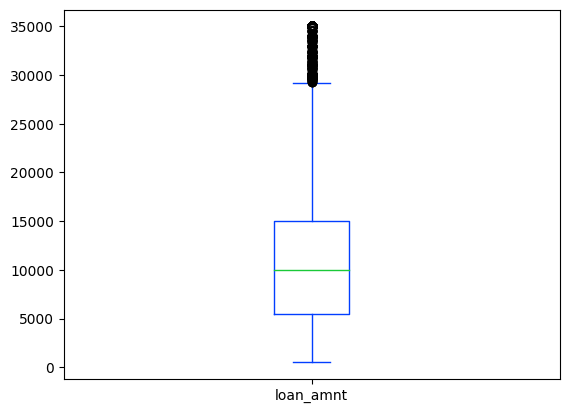

In [19]:
loan_data.loan_amnt.plot.box()

<Axes: >

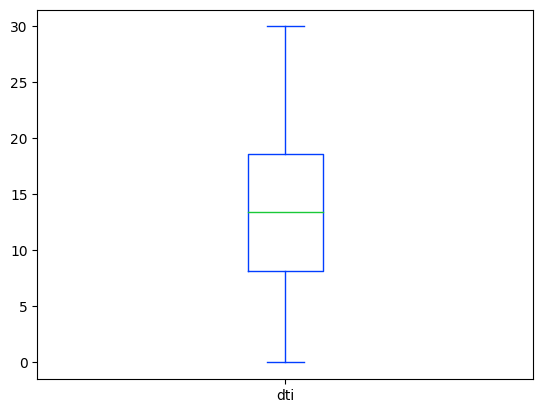

In [20]:
loan_data.dti.plot.box()

<Axes: >

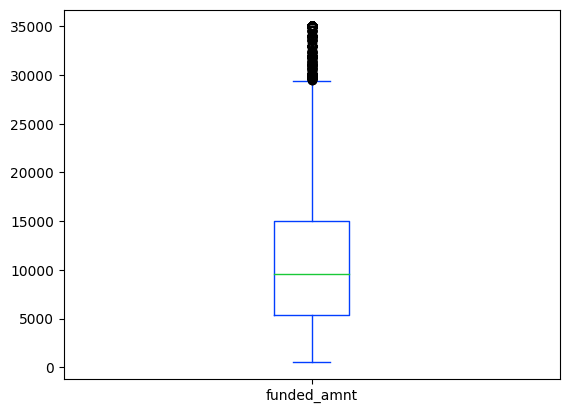

In [21]:
loan_data.funded_amnt.plot.box()

<Axes: >

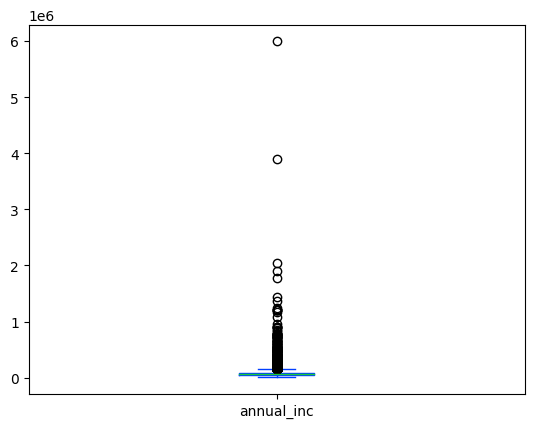

In [22]:
loan_data.annual_inc.plot.box()

In [23]:
loan_data.annual_inc.quantile(np.arange(0.05,1.05,0.05))

0.05      24000.0
0.10      30000.0
0.15      34000.0
0.20      37500.0
0.25      40404.0
0.30      45000.0
0.35      48000.0
0.40      50400.0
0.45      54996.0
0.50      59000.0
0.55      62000.0
0.60      65844.4
0.65      71000.0
0.70      75600.0
0.75      82300.0
0.80      90000.0
0.85     100000.0
0.90     116000.0
0.95     142000.0
1.00    6000000.0
Name: annual_inc, dtype: float64

In [24]:
# can see that after 0.95 there is huge difference, so we keep only till 0.95
loan_data = loan_data[loan_data.annual_inc <= loan_data.annual_inc.quantile(0.95)]

In [25]:
# As we are not considering the Current loan status, 
# we remove it from data.
loan_data = loan_data[loan_data.loan_status != "Current"]

## Data Analysis  <a class="anchor" id="data-analysis"></a>
**[Back to top](#toc)**

### Univariate Analysis <a class="anchor" id="univariate"></a>
**[Back to top](#toc)**

Text(0.5, 1.0, 'Pie distribution for loan status')

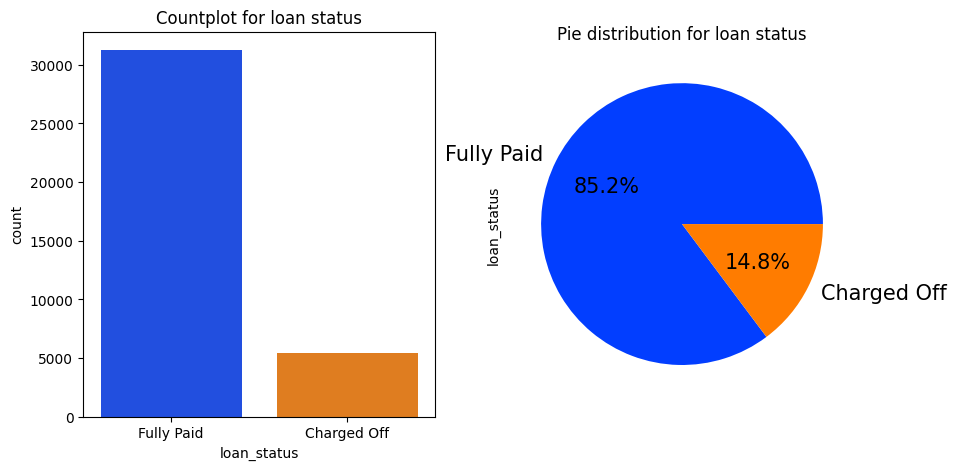

In [26]:
fig, ax = plt.subplots(1,2, figsize=(5,10))
fig1 = sns.countplot(x="loan_status", data=loan_data, ax=ax[0])
fig1.set_title("Countplot for loan status")
fig2 = loan_data.loan_status.value_counts(normalize=True).plot(kind='pie', figsize=[10,5], autopct="%.1f%%",fontsize=15)
fig2.set_title("Pie distribution for loan status")

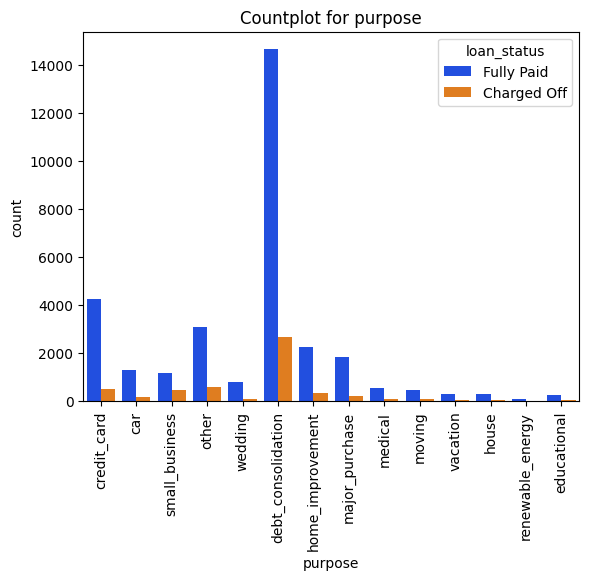

In [27]:
ax = sns.countplot(x="purpose", hue="loan_status", data=loan_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Countplot for purpose")
plt.show()

#### Observation

1. Most charged off loans were taken for debt consolidation.

Text(0.5, 1.0, 'Countplot for Emp_length')

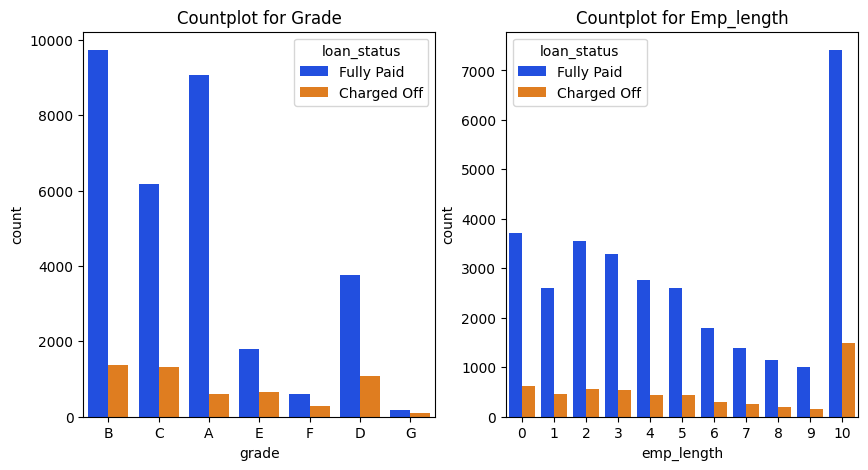

In [28]:
fig, axi = plt.subplots(1,2, figsize=(10, 5))
plot = sns.countplot(x="grade", hue="loan_status", data=loan_data, ax=axi[0])
plot.set_title('Countplot for {}'.format("Grade"))
plot = sns.countplot(x="emp_length", hue="loan_status", data=loan_data, ax=axi[1])
plot.set_title('Countplot for {}'.format("Emp_length"))

#### Observation

1. It was seen that most charged off loans were taken for the "B" Grade. 
2. Employees having experience of 10+ years tend to default more.

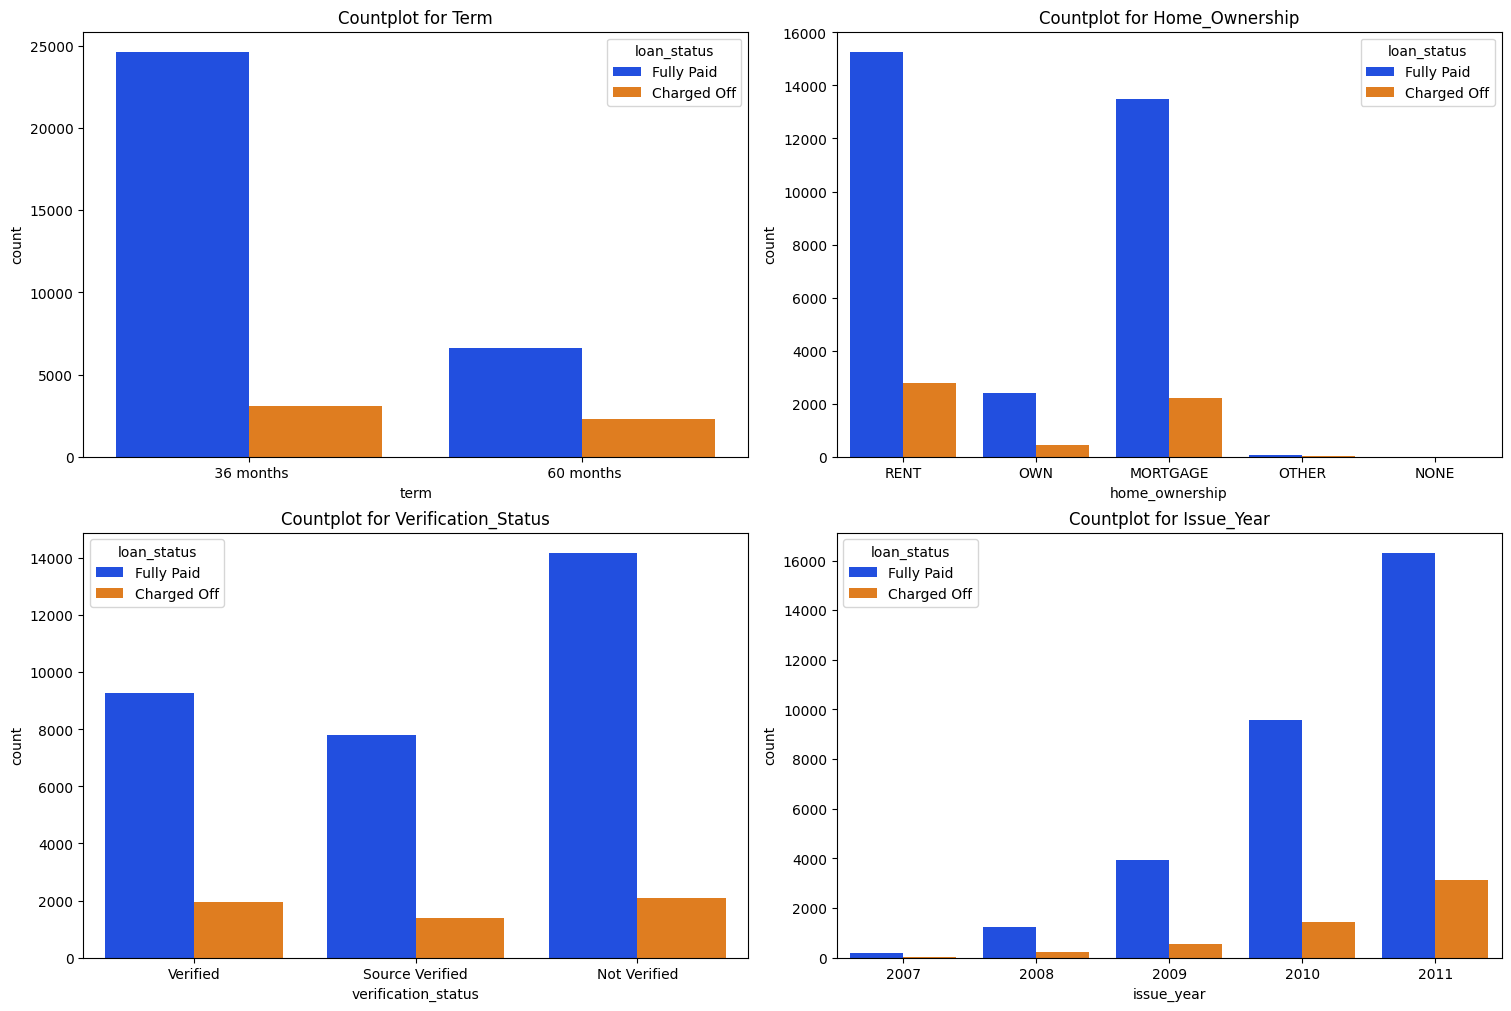

In [29]:
cat_cols=['term', 'home_ownership', 'verification_status', 'issue_year']
fig, ax = plt.subplots(math.ceil(len(cat_cols)/2),2, figsize=[15, 10], constrained_layout=True)
for axi, col in enumerate(cat_cols):
    plot = sns.countplot(data=loan_data, x=col, hue="loan_status", ax=ax[axi//2,axi%2])
    plot.set_title('Countplot for {}'.format(col.title()))
    plt.tight_layout

#### Observation

1. Loans of term 36 months, borrower having home ownership as mortgage, verified status and loans issued in 2011 have a high count of charged off loans.

### Segmented Univariate Analysis <a class="anchor" id="segmented-univariate"></a>
**[Back to top](#toc)**

In [30]:
# Group numerical to convert them to categorical values
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5, precision=0, labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5, precision=0, labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['installment_groups'] = pd.cut(loan_data['installment'], bins=10, precision=0, labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_data['funded_amnt_inv_group'] = pd.cut(loan_data['funded_amnt_inv'], bins=7, labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7, precision=0, labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5, precision=0, labels=['0-6','6-12','12-18','18-24','24-30'])

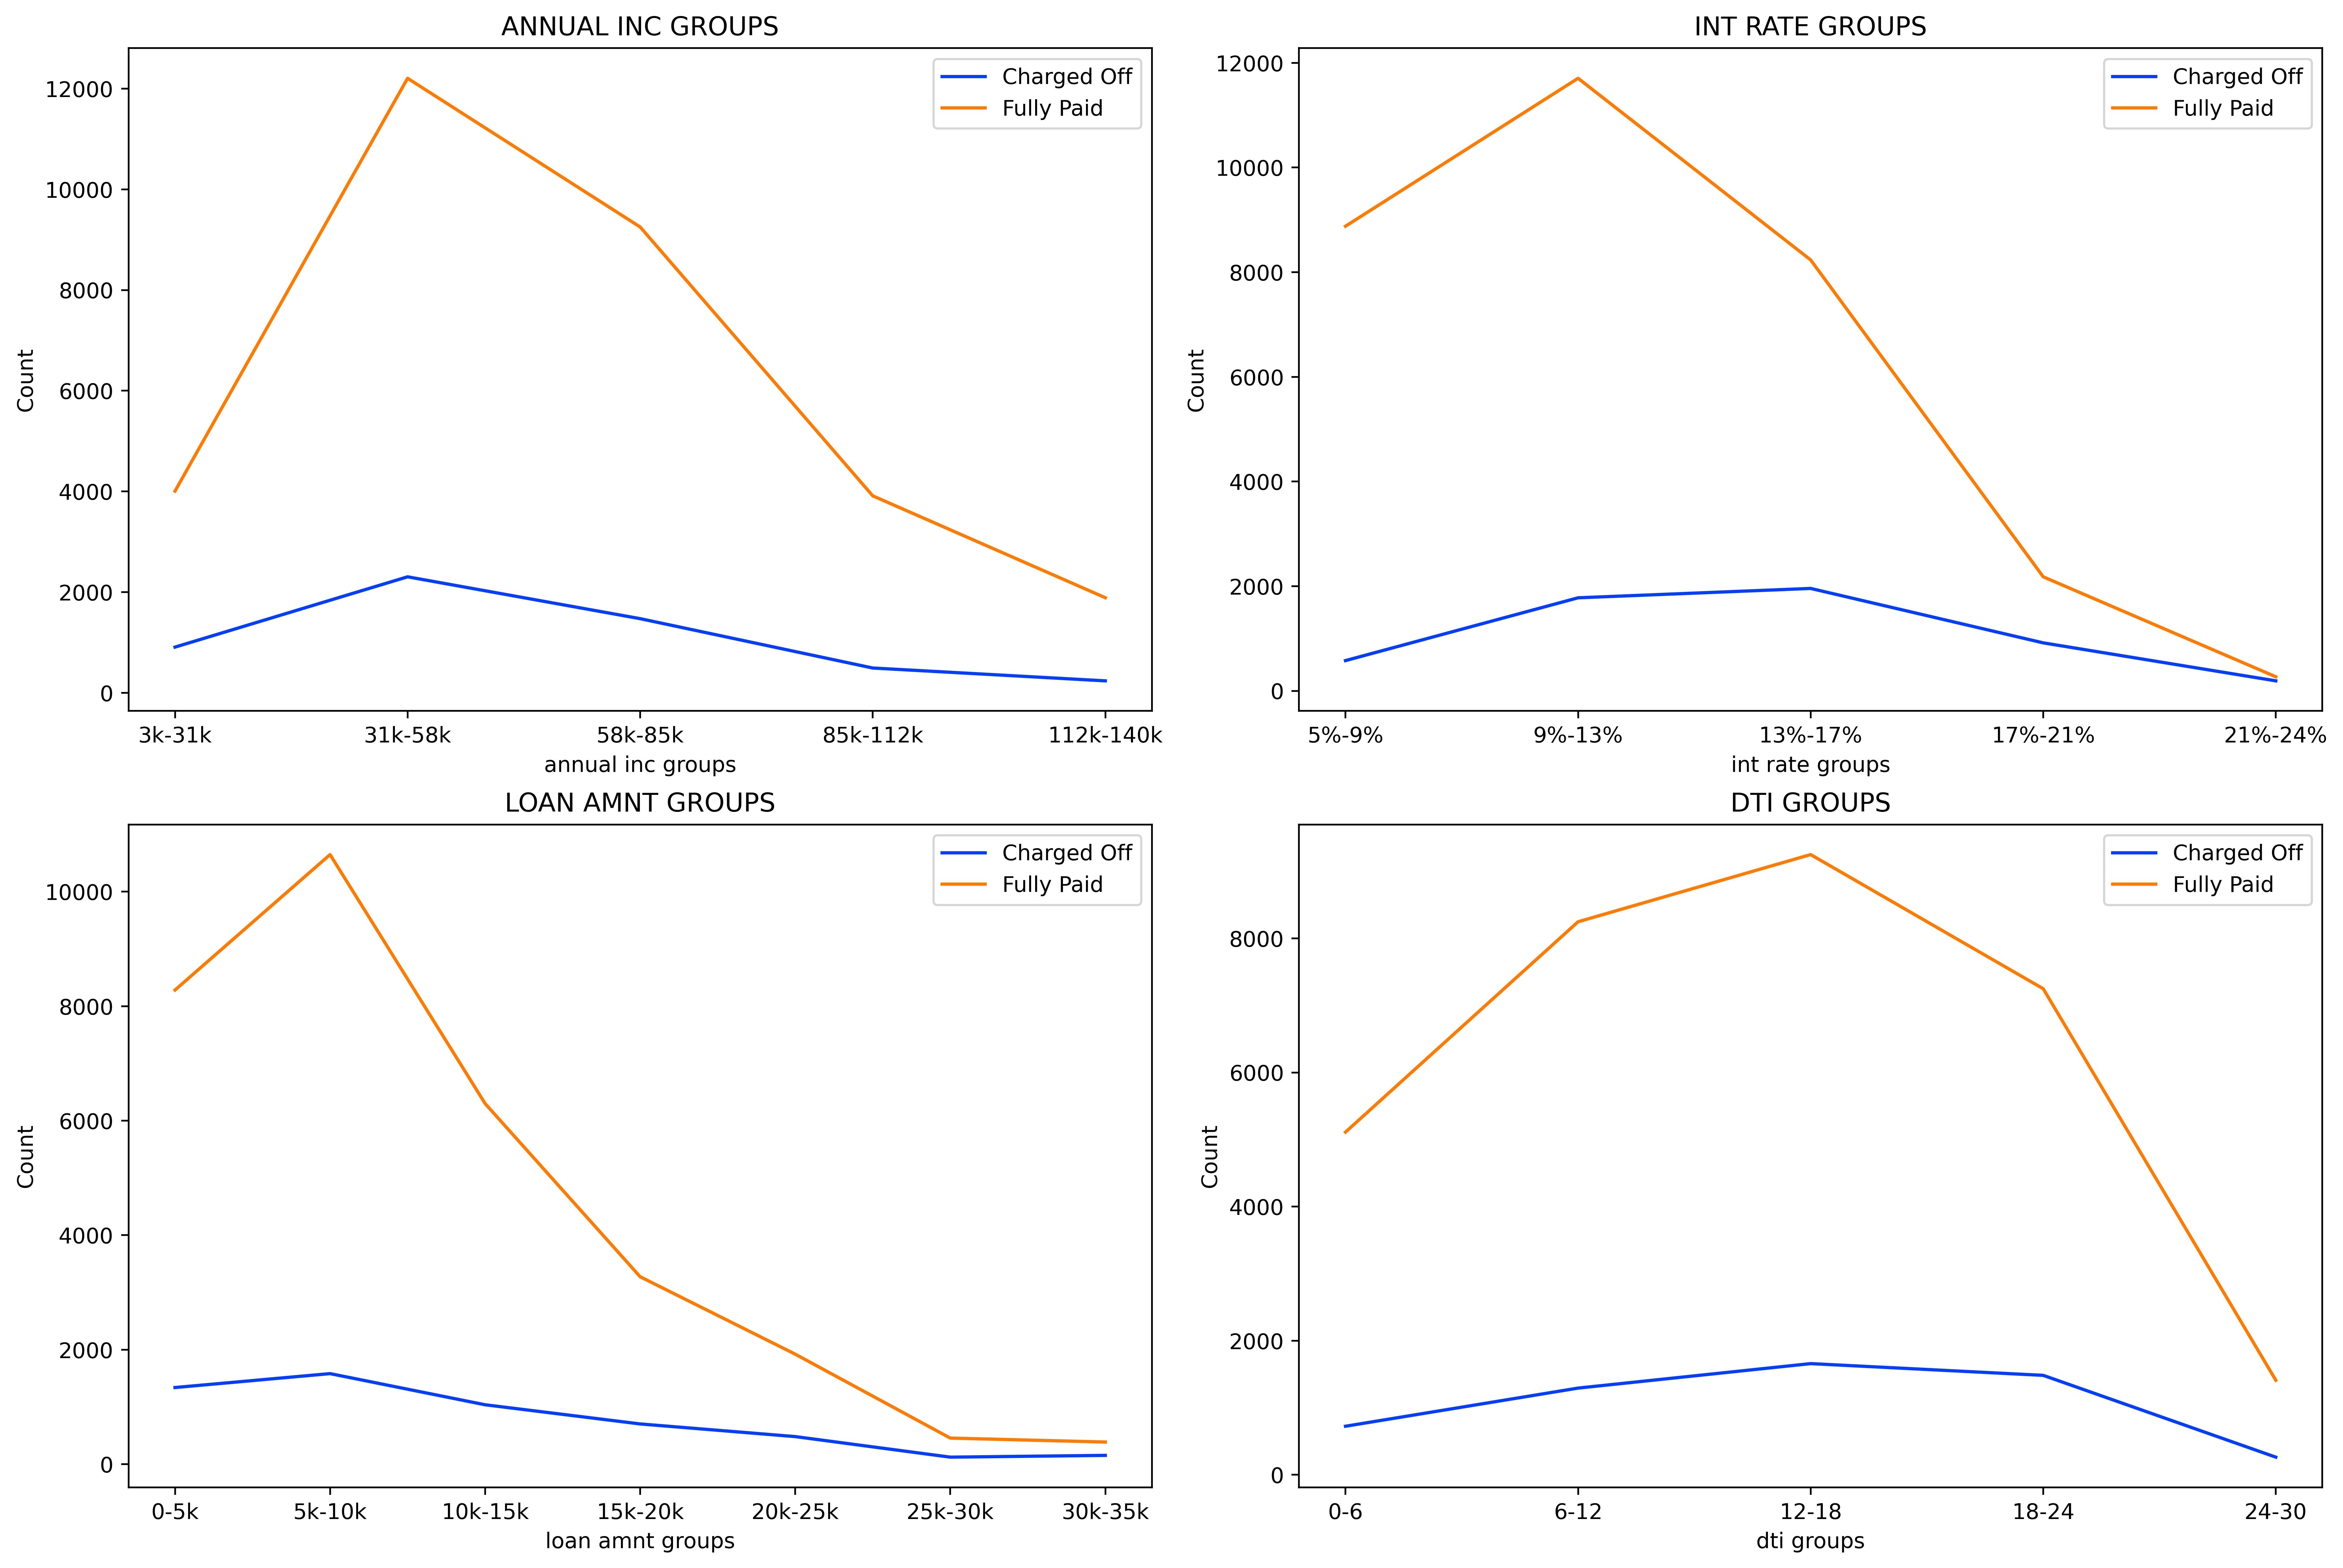

In [31]:
def get_charged_off_and_fully_paid_count(data, key):
    charged_off_count = data[data["loan_status"]== CHARGED_OFF][key].value_counts().reset_index()
    fully_paid_count = data[data["loan_status"]== FULLY_PAID][key].value_counts().reset_index()
    return charged_off_count, fully_paid_count

grouped_cols = ['annual_inc_groups', 'int_rate_groups', 'loan_amnt_groups', 'dti_groups']
fig, ax = plt.subplots(math.ceil(len(grouped_cols)/2),2, figsize=[15, 10], constrained_layout=True, dpi=500)
for axi, col in enumerate(grouped_cols):
    charged_off_count, fully_paid_count = get_charged_off_and_fully_paid_count(loan_data, col)
    plot = sns.lineplot(data=charged_off_count, x='index', y=col, legend= "auto", 
                 label=CHARGED_OFF, ax=ax[axi//2,axi%2])
    plot = sns.lineplot(data=fully_paid_count, x='index', y=col, legend = "auto", 
                 label=FULLY_PAID, ax=ax[axi//2,axi%2])
    ax[axi//2,axi%2].set_title(" ".join(col.split("_")).upper())
    ax[axi//2,axi%2].set_xlabel(" ".join(col.split("_")))
    ax[axi//2,axi%2].set_ylabel("Count")

#### Observation

Here, lower the gap between the fully paid and charged off line, higher is the chances of borrower defaulting the loan. Therefore,

1. Borrowers in the annual income range of 3k-31k and 112k-140k have higher chances of defaulting.
2. Loans given at interest rates above 17% have high probability of getting charged off.
3. Loans given of above 25k have high chances of defaulting.
4. The Debt-to-Income ratio in the range 0-6 and 24-30 have high percentage of defaulting.

### Bivariate / Multivariate Analysis <a class="anchor" id="bivariate"></a>
**[Back to top](#toc)**

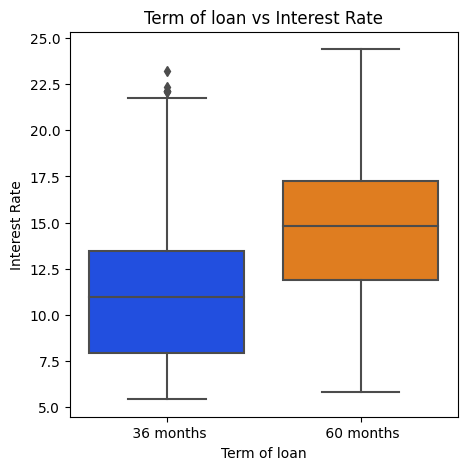

In [32]:
plt.figure(figsize=(5,5))
ax = sns.boxplot(y='int_rate', x='term', data =loan_data)
ax.set_title('Term of loan vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Term of loan')
plt.show()

#### Observation

1. Loans given for a term of 60 months have a higher median of interest rate compared to the interest rates for 36 months.

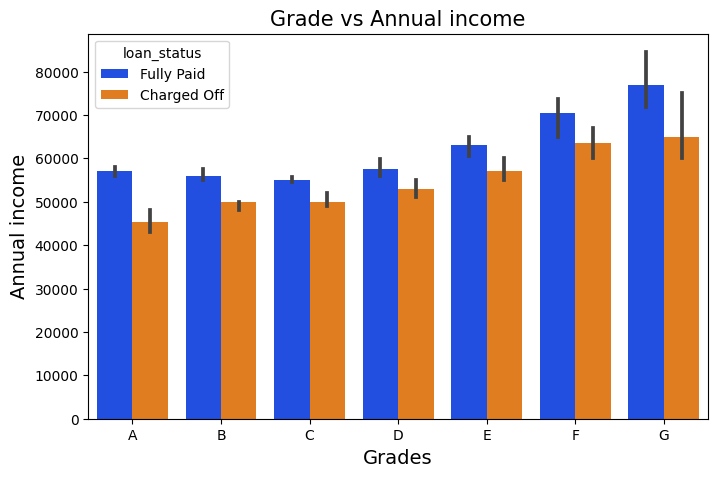

In [33]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=loan_data, estimator=np.median, order='ABCDEFG')
ax.set_title('Grade vs Annual income', fontsize=15)
ax.set_ylabel('Annual income', fontsize=14)
ax.set_xlabel('Grades', fontsize=14)
plt.show()

#### Observation

1. A common trend is seen here that 'charged off' have lower annual incomes compared to "fully paid" for each and every grade.

In [ ]:
loan_pair = loan_data[['loan_amnt', 'annual_inc', 'issue_year','int_rate','loan_status']].copy()

ax = sns.pairplot(loan_pair, 
             vars = ['loan_amnt', 'annual_inc', 'int_rate'], 
             hue = 'loan_status', diag_kind = 'kde')
ax.fig.suptitle('Pair plot of loan numeric values', y=1.04)

Text(0.5, 1.04, 'Pair plot of loan numeric values')

#### Observation

The regions where there are higher concentration of orange dots, marks the region where there are high chances of defaulting like:

1. Interest rates above 20% and loan amounts of below 10000.
2. Annual income below 50k and loan taken at interest rate above 20%.

#### Bivariate analysis on derived proportion column

In [ ]:
def get_percentage(data, key, base):
    grouped = data.groupby(by=[key, base]).size().reset_index()
    data = []
    gp = grouped.groupby(by=[key])
    for key_, df in gp:
        try:
            value = df[df[base] == CHARGED_OFF][0].iloc[0] / (df[df[base] == CHARGED_OFF][0].iloc[0] + df[df[base] == FULLY_PAID][0].iloc[0])
            data.append({key: key_, "percentage": round(value*100,2)})
        except:
            pass
    return pd.DataFrame(data)

In [ ]:
cat_cols=['grade', 'emp_length', 'term', 'home_ownership', 'verification_status', 'issue_year', 'purpose']
fig, ax = plt.subplots(math.ceil(len(cat_cols)/2),2, figsize=[15, 25], constrained_layout=True)
for axi, col in enumerate(cat_cols):
    grade_percentage_df = get_percentage(loan_data, col, "loan_status")
    plot = sns.barplot(x=col, y="percentage", data=grade_percentage_df, ax=ax[axi//2,axi%2])
    plot.set_title('Charged off percentage for {}'.format(col), fontsize=15)
    if col == "purpose":
        plt.setp(plot.get_xticklabels(), rotation=90)
    plt.tight_layout()

#### Observation

Proportion of charged off loans was taken wrt to the total loans taken for a particular category. And, we found that:

1. Loans of grade "G" have higher possibility of defaulting.
2. Loans taken for term of 60 months have higher possibility of defaulting compared to 36 months.
3. Loans taken for small businesses have higher possibility of defaulting compared to other purposes.

In [ ]:
numeric_cols_df = loan_data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti']]
 
loan_correlation = numeric_cols_df.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()

#### Observation

1. Installment, funded amount, loan amount, interest rate and investor amount are highly correlated to each other.
2. Annual Income and Debt-to-Income ratio are negatively correlated.

#### Segmented Analysis of Charged off mean for Annual Income Groups, Interest Rate Groups & Loan Amount Groups with Purpose and Grades

In [ ]:
def plot_segmented_for_categorical_variable(loan_data, x_variable, hue_variable):
    plt.figure(figsize=(20, 10))
    title = "barplot for " + x_variable + " vs " + hue_variable
    plt.title(title.title())
    sns.barplot(x=str(x_variable), y='loan_status_count', hue= hue_variable, data=loan_data, estimator=np.mean)
    plt.show()

In [ ]:
loan_data['loan_status_count'] = loan_data['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
loan_data['loan_status_count'] = loan_data['loan_status_count'].apply(lambda x: pd.to_numeric(x))

In [ ]:
plot_segmented_for_categorical_variable(loan_data, 'annual_inc_groups', 'purpose')

#### Observation

1. Constant trend seen in loans taken for small businesses getting charged off for all income groups. In the last annual income i.e., 112k to 140k it can be see that House loans have higher percentage for loans getting charged off.

In [ ]:
plot_segmented_for_categorical_variable(loan_data, 'annual_inc_groups', 'grade')

#### Observation

1. Grade "G" tends to get defaulted across all income groups apart from the highest bracket i.e., 112k to 140k. 

In [ ]:
plot_segmented_for_categorical_variable(loan_data, 'int_rate_groups', 'purpose')

#### Observation

1. Loans taken for small businesses from interest rate 9% to 17% have higher chances of defaulting compared to other purposes. Whereas in interest range of 5% to 9% and 21% to 24%, loans taken for renewable energy are more often defaulted. 

In [ ]:
plot_segmented_for_categorical_variable(loan_data, 'int_rate_groups', 'grade')

#### Observation

1. In interest rates above 13%, 'D', 'F' & 'G' grade loans comparatively have higher probability of getting charged off.

In [ ]:
plot_segmented_for_categorical_variable(loan_data, 'loan_amnt_groups', 'purpose')

#### Observation

1. In loan amounts taken from 0 to 25k, high percentage of defaulters are seen in small businesses. 
2. Loan amount in the range of 25k to 30k, there is high chance of loans taken for Moving to get charged off.

In [ ]:
plot_segmented_for_categorical_variable(loan_data, 'loan_amnt_groups', 'grade')

#### Observation

1. "G" grade loans relatively does worse compared to other grade loans across all loan amount groups.
2. In loan amounts greater than 20k, "F" grade loans has higher chances of getting charged off.

## Recommendations  <a class="anchor" id="recommendations"></a>
**[Back to top](#toc)**

##### Stop:
- Giving loans for “G” grade loans.
- Giving loans for small businesses if the borrowers income is less than 112k.
- Loan for renewable energy above the rate of 21%
- Giving loans above 10k with interest above 20%
- Giving loans to borrower having annual income less than 50k at interest rate above 20%


##### Start:
- Giving more loans for “A” grade loans.
- Medical loans to be given to mid ranged income borrower.
- Major purchase and vacation loan can be given at higher interest rate.
- Giving “F” grade loans below 13%
- Giving loans below 10% of interest rate to low income borrower. 
